# Partículas carregadas em campos eletromagnéticos

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from scipy.optimize import curve_fit

In [3]:
sns.set_theme()
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 120

## Aceleração fixa

In [97]:
Va = 0.45 * 100

In [98]:
df_accel = pd.read_csv('aceleracao_fixa.txt', sep='\t', decimal=',')

In [99]:
popt, pcov = curve_fit(
	lambda x, a, b: a * x + b,
	xdata=df_accel['Tensão de deflexão (V)'],
	ydata=df_accel['Deslocamento (cm)'],
	sigma=df_accel['Sigma Deslocamento (cm)']
)

In [100]:
popt, np.sqrt(pcov)

(array([ 0.16595086, -0.03282718]),
 array([[0.00031935, 0.00040022],
        [0.00040022, 0.00347219]]))

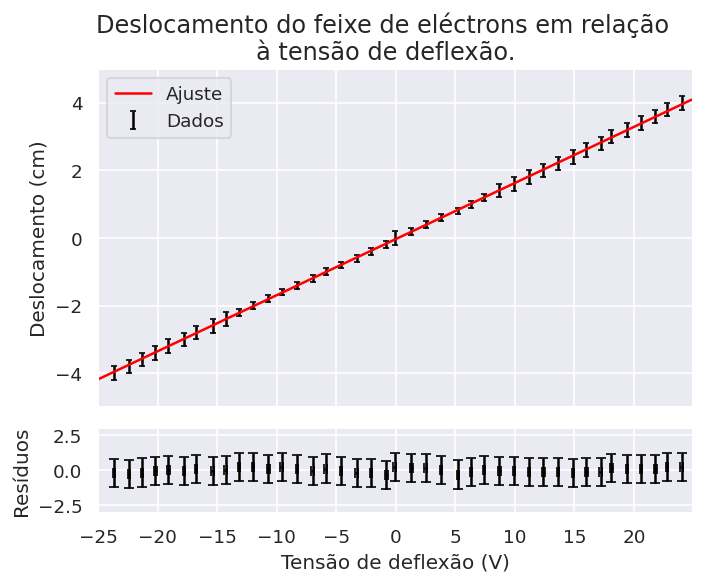

In [93]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={ 'height_ratios': (4,1), 'hspace': 0.1})
plt.suptitle('Deslocamento do feixe de eléctrons em relação \nà tensão de deflexão.')

axs[0].errorbar(
	x=df_accel['Tensão de deflexão (V)'],
	y=df_accel['Deslocamento (cm)'],
	yerr=df_accel['Sigma Deslocamento (cm)'],
	fmt=' ', marker=' ', color='black', capsize=2, label='Dados'
)

x = np.linspace(-30, 30, 10)
sns.lineplot(x=x, y=popt[0] * x + popt[1], color='red', ax=axs[0], label='Ajuste')

axs[1].errorbar(
	x=df_accel['Tensão de deflexão (V)'],
	y=(df_accel['Deslocamento (cm)'] - popt[0] * df_accel['Tensão de deflexão (V)'] - popt[1]) / df_accel['Sigma Deslocamento (cm)'],
	xerr=0.1,
	yerr=1,
	fmt=' ', marker=' ', color='black', capsize=3, capthick=1, label='Dados'
)

axs[0].set(ylabel='Deslocamento (cm)', ylim=(-5, 5))
axs[1].set(ylabel='Resíduos', xlabel='Tensão de deflexão (V)', xlim=(-25, 25), ylim=(-3, 3), xticks=np.arange(-25, 25, 5))

plt.savefig('plots/deslocamento_accel_fixa.png', dpi=300, bbox_inches='tight')
plt.show()

In [94]:
ngl = df_accel.shape[0]
ngl

41

In [95]:
chi2 = np.sum((df_accel['Deslocamento (cm)'] - popt[0] * df_accel['Tensão de deflexão (V)'] - popt[1])**2 / df_accel['Sigma Deslocamento (cm)']**2)
chi2

1.058864336988187

In [96]:
A, sA = Va * popt[0], np.sqrt( pcov[0][0] * Va**2 + 1**2 * popt[1]**2 )
A, sA

(7.467788629000473, 0.03583485274132343)

## Deflexão fixa

In [101]:
Vp, sVp = 6.8, 0.1

In [102]:
df_deflex = pd.read_csv('deflexao_fixa.txt', sep='\t', decimal=',')
df_deflex['Tensão de aceleração (V)'] *= 100

In [103]:
df_deflex.drop(index=12, inplace=True)

In [104]:
popt, pcov = curve_fit(
	lambda x, a, b: -a / x + b,
	xdata=df_deflex['Tensão de aceleração (V)'],
	ydata=df_deflex['Deslocamento (cm)'],
	sigma=df_deflex['Sigma Deslocamento (cm)']
)

In [106]:
popt, np.sqrt(pcov)

(array([-87.02083077,   0.20582601]),
 array([[4.91810037, 0.64821983],
        [0.64821983, 0.09362172]]))

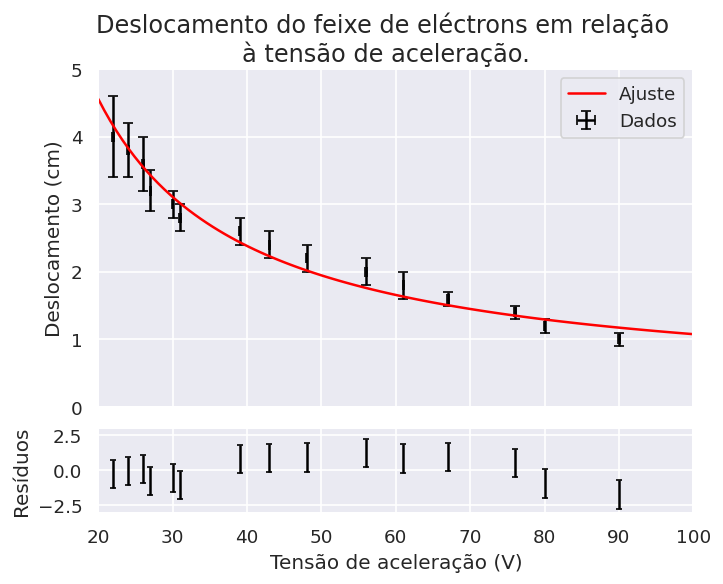

In [105]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={ 'height_ratios': (4,1), 'hspace': 0.1})
plt.suptitle('Deslocamento do feixe de eléctrons em relação \nà tensão de aceleração.')

axs[0].errorbar(
	x=df_deflex['Tensão de aceleração (V)'],
	y=df_deflex['Deslocamento (cm)'],
	xerr=0.1,
	yerr=df_deflex['Sigma Deslocamento (cm)'],
	fmt=' ', marker=' ', color='black', capsize=3, capthick=1, label='Dados'
)

x = np.linspace(20, 100, 100)
sns.lineplot(x=x, y=-popt[0] / x + popt[1], color='red', ax=axs[0], label='Ajuste')

axs[1].errorbar(
	x=df_deflex['Tensão de aceleração (V)'],
	y=(df_deflex['Deslocamento (cm)'] + popt[0] / df_deflex['Tensão de aceleração (V)'] - popt[1]) / df_deflex['Sigma Deslocamento (cm)'],
	yerr=1,
	fmt=' ', marker=' ', color='black', capsize=2, label='Dados'
)

axs[0].set(ylabel='Deslocamento (cm)', ylim=(0, 5))
axs[1].set(ylabel='Resíduos', xlabel='Tensão de aceleração (V)', xlim=(20, 100), ylim=(-3, 3))

plt.savefig('plots/deslocamento_deflex_fixa.png', dpi=300, bbox_inches='tight')
plt.show()

In [82]:
ngl = df_deflex.shape[0]
ngl

15

In [83]:
chi2 = np.sum((df_deflex['Deslocamento (cm)'] + popt[0] / df_deflex['Tensão de aceleração (V)'] - popt[1])**2 / df_deflex['Sigma Deslocamento (cm)']**2)
chi2

11.457387300125205

In [86]:
A, sA = -popt[0] / Vp, np.sqrt( pcov[0][0] / Vp**2 + sVp**2 * popt[0]**2 / Vp**4 )
A, sA

(12.797180995226784, 0.7473336347009164)